In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Simulation 1: two preys and one predator

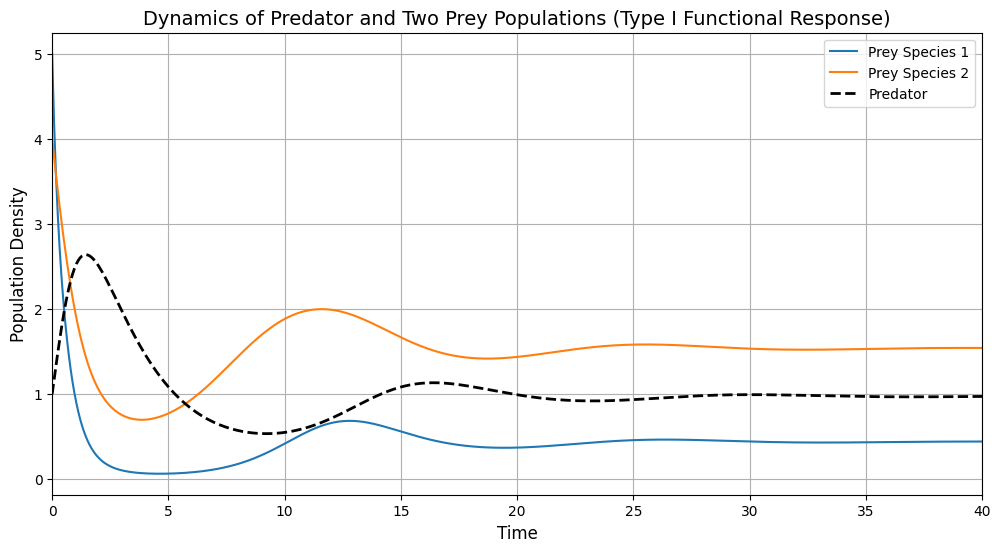

In [45]:
def predator_prey_model(y, t, r, K, a, b, C, B):
    R1, R2, P = y  # Prey 1, Prey 2, and Predator populations

    # Differential equations for prey
    dR1dt = r[0] * R1 * (1 - R1 / K[0]) - a[0] * R1 * P
    dR2dt = r[1] * R2 * (1 - R2 / K[1]) - a[1] * R2 * P

    # Differential equation for predator
    dPdt = B * P * ((a[0] * b[0] * R1 + a[1] * b[1] * R2) - C)

    return [dR1dt, dR2dt, dPdt]

r = [1.0, 0.8]       
K = [2.0, 3.0]     
a = [0.8, 0.4]     
b = [0.7, 0.9]      
B = 0.6            
C = .8            

# Initial conditions
R1_0 = 5.0           
R2_0 = 4.0           
P0 = 1.0             
initial_conditions = [R1_0, R2_0, P0]

time_span = (0, 40)
time_eval = np.linspace(time_span[0], time_span[1], 500)

solution = odeint(predator_prey_model, initial_conditions, time_eval, args=(r, K, a, b, C, B))

R1 = solution[:, 0]  
R2 = solution[:, 1]  
P = solution[:, 2]   

plt.figure(figsize=(12, 6))

plt.plot(time_eval, R1, label="Prey Species 1")
plt.plot(time_eval, R2, label="Prey Species 2")
plt.plot(time_eval, P, label="Predator", linewidth=2, linestyle='--', color='black')
plt.xlim(time_span)
plt.title("Dynamics of Predator and Two Prey Populations (Type I Functional Response)", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Population Density", fontsize=12)
plt.legend()
plt.grid()
plt.show()

Simulation 2: two identical prey species

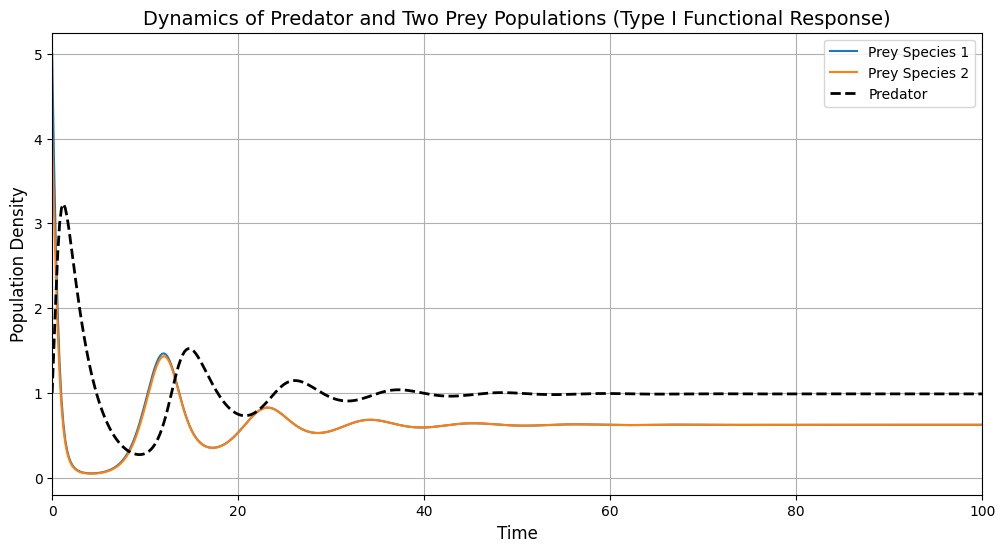

In [28]:
def predator_prey_model(y, t, r, K, a, b, C, B):
    R1, R2, P = y  # Prey 1, Prey 2, and Predator populations

    # Differential equations for prey
    dR1dt = r * R1 * (1 - R1 / K) - a * R1 * P
    dR2dt = r * R2 * (1 - R2 / K) - a * R2 * P

    # Differential equation for predator
    dPdt = B * P * ((a * b * R1 + a * b * R2) - C)

    return [dR1dt, dR2dt, dPdt]

r = 1.0                
K = 3.0    
a = 0.8      
b = 0.7      
B = 0.6            
C = 0.7         

# Initial conditions
R1_0 = 5.0       
R2_0 = 4.0           
P0 = 1.0            
initial_conditions = [R1_0, R2_0, P0]

time_span = (0, 100)
time_eval = np.linspace(time_span[0], time_span[1], 500)

solution = odeint(predator_prey_model, initial_conditions, time_eval, args=(r, K, a, b, C, B))

R1 = solution[:, 0] 
R2 = solution[:, 1]  
P = solution[:, 2]   

plt.figure(figsize=(12, 6))

plt.plot(time_eval, R1, label="Prey Species 1")
plt.plot(time_eval, R2, label="Prey Species 2")
plt.plot(time_eval, P, label="Predator", linewidth=2, linestyle='--', color='black')
plt.xlim(time_span)
plt.title("Dynamics of Predator and Two Prey Populations (Type I Functional Response)", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Population Density", fontsize=12)
plt.legend()
plt.grid()
plt.show()

Simulation 3: Type II response

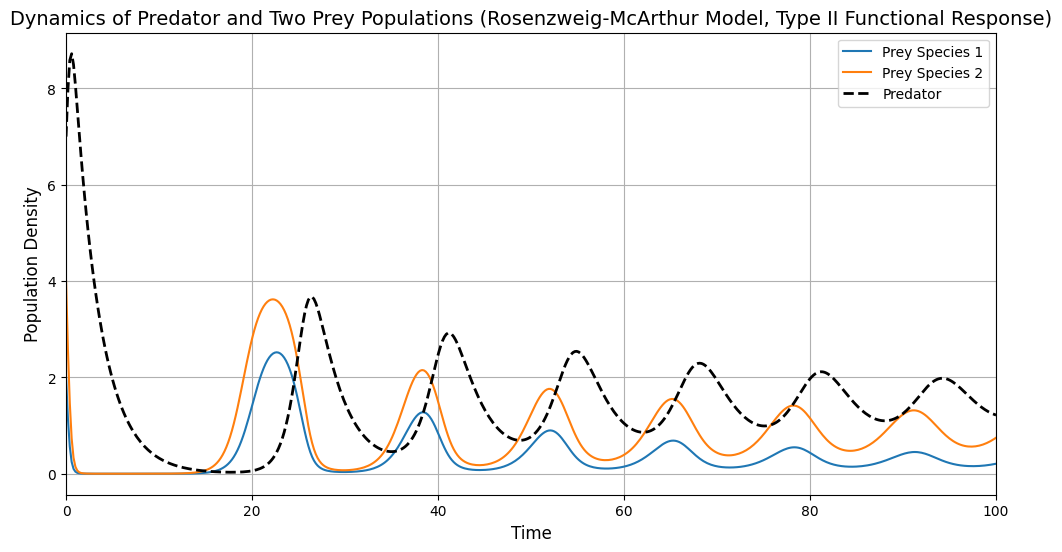

In [41]:
def predator_prey_model(y, t, r, K, a, b, C, B, h):
    R1, R2, P = y  # Prey 1, Prey 2, and Predator populations

    # Differential equations for prey (Type II functional response)
    dR1dt = r[0] * R1 * (1 - R1 / K[0]) - (a[0] * R1 / (1 + a[0] * h * R1)) * P
    dR2dt = r[1] * R2 * (1 - R2 / K[1]) - (a[1] * R2 / (1 + a[1] * h * R2)) * P

    # Differential equation for predator
    dPdt = B * P * ((a[0] * b[0] * R1 / (1 + a[0] * h * R1)) + (a[1] * b[1] * R2 / (1 + a[1] * h * R2)) - C)

    return [dR1dt, dR2dt, dPdt]

r = [1.0, 1.0]                
K = [3.0, 4.0]           
a = [0.65, 0.65]               
b = [0.75, 0.75]                
B = 0.8               
C = 0.45               
h = 0.5            

# Initial conditions
R1_0 = 2.0            
R2_0 = 4.0            
P0 = 7.0              
initial_conditions = [R1_0, R2_0, P0]

time_span = (0, 100)
time_eval = np.linspace(time_span[0], time_span[1], 500)

solution = odeint(predator_prey_model, initial_conditions, time_eval, args=(r, K, a, b, C, B, h))

R1 = solution[:, 0]  
R2 = solution[:, 1]  
P = solution[:, 2]   

plt.figure(figsize=(12, 6))

plt.plot(time_eval, R1, label="Prey Species 1")
plt.plot(time_eval, R2, label="Prey Species 2")
plt.plot(time_eval, P, label="Predator", linewidth=2, linestyle='--', color='black')
plt.xlim(time_span)
plt.title("Dynamics of Predator and Two Prey Populations (Rosenzweig-McArthur Model, Type II Functional Response)", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Population Density", fontsize=12)
plt.legend()
plt.grid()
plt.show()
